# 프로그래밍3 프로젝트
산업데이터사이언스학부 201904200 김지혜

### 1. 데이터에 대한 설명

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#환경부가 지정 보호하는 생물의 정보를 제공하는 한국의 멸종위기종 데이터
species = pd.read_csv('data/Endangered_Species.csv', encoding='cp949')
species

,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
0,포유류,I,늑대,Canis lupus coreanus,NaN,RE,LC
1,포유류,I,대륙사슴,Cervus nippon hortulorum,NaN,RE,LC
2,포유류,I,반달가슴곰,Ursus thibetanus ussuricus,NaN,EN,VU
3,포유류,I,붉은박쥐,Myotis rufoniger,NaN,VU,LC
4,포유류,I,사향노루,Moschus moschiferus,NaN,CR,VU
...,...,...,...,...,...,...,...
262,식물,II,홍월귤,Arctous alpinus var. japonicus,NaN,VU,NaN
263,식물,II,황근,Hibiscus hamabo,NaN,VU,NaN
264,해조류,II,그물공말,Dictyosphaeria cavernosa,NaN,NaN,NaN
265,해조류,II,삼나무말,Coccophora langsdorfii,NaN,NaN,NaN


In [3]:
#컬럼의 구성 확인

species.columns
#분류군: 생물의 분류 단위
#등급: 멸종위기에 처할 우려가 있는 2급과 멸종위기에 처한 1급으로 구성
#고유종: 고유종 여부
#세계자연보전연맹: 특정 종의 멸종 위험도를 평가해 등급으로 분류
#국가적색목록: 우리나라에서 세계자연보전연맹의 범주에 따라 분류한 적색목록

Index(['분류군', '등급', '국명', '학명', '고유종', '국가적색목록', '세계자연보전연맹'], dtype='object')

In [4]:
#멸종위기등급 확인
species.세계자연보전연맹.value_counts()

LC    63
VU    24
EN    16
NT     7
CR     3
DD     3
Name: 세계자연보전연맹, dtype: int64

##### EX(절멸) - EW(야생절멸) - CR(위급) - EN(위기) - VU(취약) - NT(준위협) - LC(관심대상) - DD(정보부족) - NE(미평가) + RE(지역절멸)

In [ ]:
#EX(절멸): 마지막 개체가 죽었다는 사실에 합리적 의심의 여지가 없는 경우
#EW(야생절멸): 인간의 손에 의한 사욱 및 경작 또는 과거의 살던 곳으로부터 벗어난 장소에서의 귀화 개체군으로만 생존한 경우
#CR(위급): 야생에서 극도로 높은 멸종 위험에 처한 분류군
#EN(위기): 야생에서 매우 높은 멸종 위험에 처한 분류군
#VU(취약): 야생에서 높은 멸종 위험에 처한 분류군
#NT(준위협): 가까운 미래에 멸종위기범주에 처할 가능성이 높은 경우
#LC(관심대상): 위험도가 낮고 멸종위기범주에 도달하지 않은 경우

### 2. 데이터 탐색

In [4]:
#데이터 형식 확인: 모두 object(문자)로 이루어져 있다
species.dtypes

분류군         object
등급          object
국명          object
학명          object
고유종         object
국가적색목록      object
세계자연보전연맹    object
dtype: object

In [6]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   분류군       267 non-null    object
 1   등급        267 non-null    object
 2   국명        267 non-null    object
 3   학명        267 non-null    object
 4   고유종       46 non-null     object
 5   국가적색목록    237 non-null    object
 6   세계자연보전연맹  116 non-null    object
dtypes: object(7)
memory usage: 14.7+ KB


In [5]:
#describe() 확인

species.describe().T
#국명, 학명의 count와 unique가 같아 모든 행의 데이터가 다름을 파악
#고유종의 unique는 1 확인

,count,unique,top,freq
분류군,267,9,식물,88
등급,267,2,II,207
국명,267,267,흑비둘기,1
학명,267,267,Nipponia nippon,1
고유종,46,1,Y,46
국가적색목록,237,7,VU,99
세계자연보전연맹,116,6,LC,63


In [8]:
#데이터 비율 확인
species.국가적색목록.value_counts(normalize=True)

VU    0.417722
EN    0.329114
CR    0.143460
RE    0.037975
LC    0.033755
NE    0.021097
NT    0.016878
Name: 국가적색목록, dtype: float64

In [9]:
species.세계자연보전연맹.value_counts(normalize=True)

LC    0.543103
VU    0.206897
EN    0.137931
NT    0.060345
CR    0.025862
DD    0.025862
Name: 세계자연보전연맹, dtype: float64

In [6]:
#NA값 확인
species.isna().sum()

분류군           0
등급            0
국명            0
학명            0
고유종         221
국가적색목록       30
세계자연보전연맹    151
dtype: int64

### 3. 데이터 분석

In [ ]:
#데이터 전처리

In [11]:
#NaN값 처리

#고유종 컬럼은 고유종인 경우에는 Y, 고유종이 아닌 경우에는 NaN값을 가진다
species.고유종.value_counts(dropna=False)

NaN    221
Y       46
Name: 고유종, dtype: int64

In [7]:
#고유종의 NaN값에 'N'을 채움
species.고유종 = species.고유종.fillna('N')

In [8]:
#국가적색목록, 세계자연보전연맹의 NaN값에 'NE(미평가)'를 채움
species.국가적색목록 = species.국가적색목록.fillna('NE')
species.세계자연보전연맹 = species.세계자연보전연맹.fillna('NE')

In [14]:
species.isna().sum()

분류군         0
등급          0
국명          0
학명          0
고유종         0
국가적색목록      0
세계자연보전연맹    0
dtype: int64

In [10]:
#데이터 타입 변경

species.info()
#memory usage: 14.7+ KB 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   분류군       267 non-null    object
 1   등급        267 non-null    object
 2   국명        267 non-null    object
 3   학명        267 non-null    object
 4   고유종       267 non-null    object
 5   국가적색목록    267 non-null    object
 6   세계자연보전연맹  267 non-null    object
dtypes: object(7)
memory usage: 14.7+ KB


In [11]:
#memory_usage는 국명, 분류군, 학명, ... 순서대로 크다
species.memory_usage(deep=True)

Index         128
분류군         23302
등급          15693
국명          24316
학명          20492
고유종         15486
국가적색목록      15753
세계자연보전연맹    15753
dtype: int64

In [17]:
#국명은 모든 행의 값이 다르기 때문에 데이터 타입 변경 의미가 없다
species.describe().T

,count,unique,top,freq
분류군,267,9,식물,88
등급,267,2,II,207
국명,267,267,서울개발나물,1
학명,267,267,Leontopodium hallaisanense,1
고유종,267,2,N,221
국가적색목록,267,7,VU,99
세계자연보전연맹,267,7,NE,151


In [18]:
species.분류군.value_counts()

식물       88
조류       63
무척추동물    32
어류       27
곤충류      26
포유류      20
양서파충류     8
해조류       2
고등균류      1
Name: 분류군, dtype: int64

In [12]:
#따라서 분류군의 데이터 타입을 category로 변경
species['분류군'] = species['분류군'].astype('category')

In [20]:
species.info()
#13.3+ KB로 소폭 줄어듦

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   분류군       267 non-null    category
 1   등급        267 non-null    object  
 2   국명        267 non-null    object  
 3   학명        267 non-null    object  
 4   고유종       267 non-null    object  
 5   국가적색목록    267 non-null    object  
 6   세계자연보전연맹  267 non-null    object  
dtypes: category(1), object(6)
memory usage: 13.3+ KB


In [ ]:
#데이터 시각화

In [21]:
#DataFrame형태로는 데이터가 눈에 잘 들어오지 않는다
species[['분류군', '국명', '국가적색목록', '세계자연보전연맹']]

,분류군,국명,국가적색목록,세계자연보전연맹
0,포유류,늑대,RE,LC
1,포유류,대륙사슴,RE,LC
2,포유류,반달가슴곰,EN,VU
3,포유류,붉은박쥐,VU,LC
4,포유류,사향노루,CR,VU
...,...,...,...,...
262,식물,홍월귤,VU,NE
263,식물,황근,VU,NE
264,해조류,그물공말,NE,NE
265,해조류,삼나무말,NE,NE


In [9]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<BarContainer object of 9 artists>

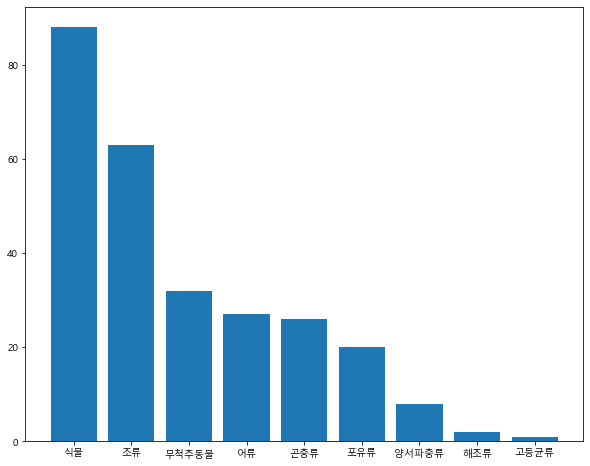

In [10]:
#분류군의 분포 확인

fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(species.분류군.value_counts().index, species.분류군.value_counts())
#한국의 멸종위기종은 식물이 가장 많고, 고등군류가 가장 적다.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='국가적색목록'>

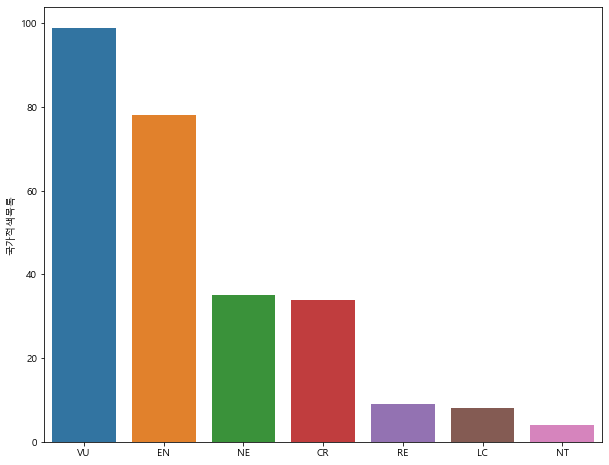

In [11]:
#국가적색목록 분류 분포 확인

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(species.국가적색목록.value_counts().index, species.국가적색목록.value_counts())
#VU, EN, CR, ...순으로 분포

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='세계자연보전연맹'>

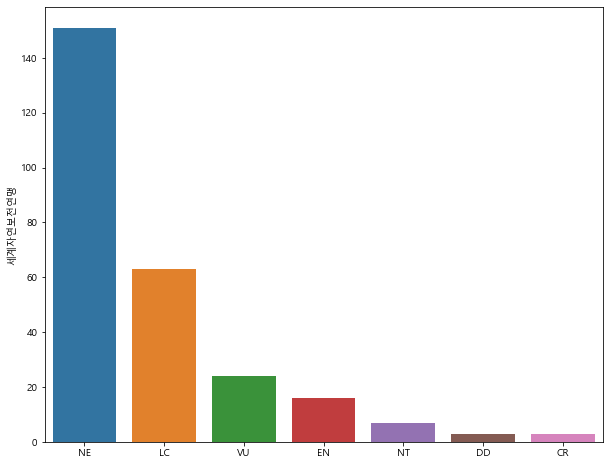

In [12]:
#세계자연보전연맹 분류 분포 확인

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(species.세계자연보전연맹.value_counts().index, species.세계자연보전연맹.value_counts())
#미평가인 NE를 제외, LC, VU, EN, ...순으로 분포

<AxesSubplot:xlabel='count', ylabel='분류군'>

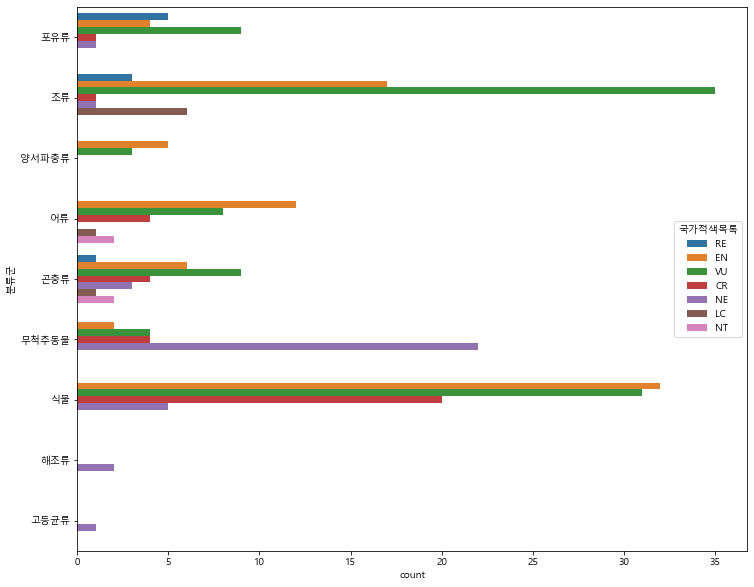

In [13]:
#분류군 별 국가적색목록의 분포

fig, ax = plt.subplots(figsize=(12, 10))

sns.countplot(y='분류군',
              data=species,
              hue='국가적색목록'
)
#조류는 VU(취약)등급이 가장 많고, 식물은 분류군 중 CR(위급)등급이 가장 많다.

<AxesSubplot:xlabel='count', ylabel='분류군'>

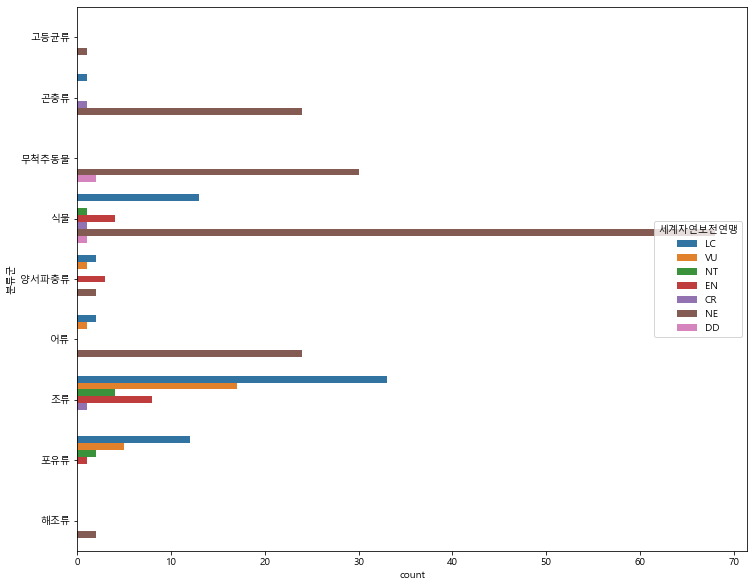

In [27]:
#분류군 별 세계자연보전연맹의 분포

fig, ax = plt.subplots(figsize=(12, 10))

sns.countplot(y='분류군',
              data=species,
              hue='세계자연보전연맹'
)

In [ ]:
#불리언 비교

In [14]:
#멸종위기범주(CR, EN, VU) a그룹
a1 = species['국가적색목록'] == 'CR'
a2 = species['국가적색목록'] == 'EN'
a3 = species['국가적색목록'] == 'VU'

a = a1 | a2 | a3

In [15]:
#그 외 b그룹
b1 = species['국가적색목록'] == 'NT'
b2 = species['국가적색목록'] == 'LC'

b = b1 | b2

In [16]:
print(a.sum(), b.sum())
#멸종위기범주의 a그룹이 압도적으로 많음을 알 수 있다.

211 12


In [31]:
#멸종위기종 국명과 국가적색목록 등급, 국명과 세계자연보전연맹 등급을 따로 출력하고 싶을 때
species.melt(id_vars=['국명'], value_vars=['국가적색목록', '세계자연보전연맹'])

,국명,variable,value
0,늑대,국가적색목록,RE
1,대륙사슴,국가적색목록,RE
2,반달가슴곰,국가적색목록,EN
3,붉은박쥐,국가적색목록,VU
4,사향노루,국가적색목록,CR
...,...,...,...
529,홍월귤,세계자연보전연맹,NE
530,황근,세계자연보전연맹,NE
531,그물공말,세계자연보전연맹,NE
532,삼나무말,세계자연보전연맹,NE


In [17]:
#분류군과 등급을 그룹으로 묶고 display함수를 사용해 출력
species = species[['분류군', '등급', '국명', '국가적색목록']]

a = species.groupby(['분류군', '등급'])

for n, g in a:
    print(n)
    display(g.head(3))

('고등균류', 'II')


,분류군,등급,국명,국가적색목록
266,고등균류,II,화경버섯,NE


('곤충류', 'I')


,분류군,등급,국명,국가적색목록
118,곤충류,I,붉은점모시나비,VU
119,곤충류,I,비단벌레,VU
120,곤충류,I,산굴뚝나비,EN


('곤충류', 'II')


,분류군,등급,국명,국가적색목록
124,곤충류,II,깊은산부전나비,VU
125,곤충류,II,꼬마잠자리,VU
126,곤충류,II,노란잔산잠자리,EN


('무척추동물', 'I')


,분류군,등급,국명,국가적색목록
144,무척추동물,I,귀이빨대칭이,VU
145,무척추동물,I,나팔고둥,VU
146,무척추동물,I,남방방게,NE


('무척추동물', 'II')


,분류군,등급,국명,국가적색목록
148,무척추동물,II,갯게,NE
149,무척추동물,II,거제외줄달팽이,CR
150,무척추동물,II,검붉은수지맨드라미,NE


('식물', 'I')


,분류군,등급,국명,국가적색목록
176,식물,I,광릉요강꽃,CR
177,식물,I,금자란,EN
178,식물,I,나도풍란,CR


('식물', 'II')


,분류군,등급,국명,국가적색목록
187,식물,II,가는동자꽃,NE
188,식물,II,가시연,VU
189,식물,II,가시오갈피나무,VU


('양서파충류', 'I')


,분류군,등급,국명,국가적색목록
83,양서파충류,I,비바리뱀,EN
84,양서파충류,I,수원청개구리,EN


('양서파충류', 'II')


,분류군,등급,국명,국가적색목록
85,양서파충류,II,고리도룡뇽,EN
86,양서파충류,II,구렁이,EN
87,양서파충류,II,금개구리,VU


('어류', 'I')


,분류군,등급,국명,국가적색목록
91,어류,I,감돌고기,EN
92,어류,I,꼬치동자개,EN
93,어류,I,남방동사리,CR


('어류', 'II')


,분류군,등급,국명,국가적색목록
102,어류,II,가는돌고기,NT
103,어류,II,가시고기,VU
104,어류,II,꺽저기,EN


('조류', 'I')


,분류군,등급,국명,국가적색목록
20,조류,I,검독수리,EN
21,조류,I,넓적부리도요,CR
22,조류,I,노랑부리백로,EN


('조류', 'II')


,분류군,등급,국명,국가적색목록
34,조류,II,개리,EN
35,조류,II,검은머리갈매기,EN
36,조류,II,검은머리물떼새,VU


('포유류', 'I')


,분류군,등급,국명,국가적색목록
0,포유류,I,늑대,RE
1,포유류,I,대륙사슴,RE
2,포유류,I,반달가슴곰,EN


('포유류', 'II')


,분류군,등급,국명,국가적색목록
12,포유류,II,담비,VU
13,포유류,II,무산쇠족제비,VU
14,포유류,II,물개,VU


('해조류', 'II')


,분류군,등급,국명,국가적색목록
264,해조류,II,그물공말,NE
265,해조류,II,삼나무말,NE


In [18]:
#분류군과 국가적색목록을 그룹으로 묶어 출력
a = species.groupby(['분류군', '국가적색목록'])

for n, g in a:
    print(n)
    display(g.head(3))

('고등균류', 'NE')


,분류군,등급,국명,국가적색목록
266,고등균류,II,화경버섯,NE


('곤충류', 'CR')


,분류군,등급,국명,국가적색목록
121,곤충류,I,상제나비,CR
122,곤충류,I,수염풍뎅이,CR
123,곤충류,I,장수하늘소,CR


('곤충류', 'EN')


,분류군,등급,국명,국가적색목록
120,곤충류,I,산굴뚝나비,EN
126,곤충류,II,노란잔산잠자리,EN
127,곤충류,II,닻무늬길앞잡이,EN


('곤충류', 'LC')


,분류군,등급,국명,국가적색목록
136,곤충류,II,애기뿔소똥구리,LC


('곤충류', 'NE')


,분류군,등급,국명,국가적색목록
130,곤충류,II,뚱보주름메뚜리,NE
133,곤충류,II,물장군,NE
140,곤충류,II,참호박뒤영벌,NE


('곤충류', 'NT')


,분류군,등급,국명,국가적색목록
131,곤충류,II,멋조롱박딱정벌레,NT
132,곤충류,II,물방개,NT


('곤충류', 'RE')


,분류군,등급,국명,국가적색목록
134,곤충류,II,소똥구리,RE


('곤충류', 'VU')


,분류군,등급,국명,국가적색목록
118,곤충류,I,붉은점모시나비,VU
119,곤충류,I,비단벌레,VU
124,곤충류,II,깊은산부전나비,VU


('무척추동물', 'CR')


,분류군,등급,국명,국가적색목록
147,무척추동물,I,두드럭조개,CR
149,무척추동물,II,거제외줄달팽이,CR
157,무척추동물,II,물거미,CR


('무척추동물', 'EN')


,분류군,등급,국명,국가적색목록
163,무척추동물,II,염주알다슬기,EN
170,무척추동물,II,참달팽이,EN


('무척추동물', 'NE')


,분류군,등급,국명,국가적색목록
146,무척추동물,I,남방방게,NE
148,무척추동물,II,갯게,NE
150,무척추동물,II,검붉은수지맨드라미,NE


('무척추동물', 'VU')


,분류군,등급,국명,국가적색목록
144,무척추동물,I,귀이빨대칭이,VU
145,무척추동물,I,나팔고둥,VU
152,무척추동물,II,기수갈고둥,VU


('식물', 'CR')


,분류군,등급,국명,국가적색목록
176,식물,I,광릉요강꽃,CR
178,식물,I,나도풍란,CR
179,식물,I,만년콩,CR


('식물', 'EN')


,분류군,등급,국명,국가적색목록
177,식물,I,금자란,EN
180,식물,I,비자란,EN
198,식물,II,나도승마,EN


('식물', 'NE')


,분류군,등급,국명,국가적색목록
187,식물,II,가는동자꽃,NE
194,식물,II,검은별고사리,NE
219,식물,II,산분꽃나무,NE


('식물', 'VU')


,분류군,등급,국명,국가적색목록
188,식물,II,가시연,VU
189,식물,II,가시오갈피나무,VU
191,식물,II,개가시나무,VU


('양서파충류', 'EN')


,분류군,등급,국명,국가적색목록
83,양서파충류,I,비바리뱀,EN
84,양서파충류,I,수원청개구리,EN
85,양서파충류,II,고리도룡뇽,EN


('양서파충류', 'VU')


,분류군,등급,국명,국가적색목록
87,양서파충류,II,금개구리,VU
88,양서파충류,II,남생이,VU
89,양서파충류,II,맹꽁이,VU


('어류', 'CR')


,분류군,등급,국명,국가적색목록
93,어류,I,남방동사리,CR
97,어류,I,여울마자,CR
110,어류,II,버들가지,CR


('어류', 'EN')


,분류군,등급,국명,국가적색목록
91,어류,I,감돌고기,EN
92,어류,I,꼬치동자개,EN
94,어류,I,모래주사,EN


('어류', 'LC')


,분류군,등급,국명,국가적색목록
115,어류,II,큰줄납자루,LC


('어류', 'NT')


,분류군,등급,국명,국가적색목록
102,어류,II,가는돌고기,NT
108,어류,II,묵납자루,NT


('어류', 'VU')


,분류군,등급,국명,국가적색목록
101,어류,I,흰수마자,VU
103,어류,II,가시고기,VU
105,어류,II,꾸구리,VU


('조류', 'CR')


,분류군,등급,국명,국가적색목록
21,조류,I,넓적부리도요,CR


('조류', 'EN')


,분류군,등급,국명,국가적색목록
20,조류,I,검독수리,EN
22,조류,I,노랑부리백로,EN
23,조류,I,두루미,EN


('조류', 'LC')


,분류군,등급,국명,국가적색목록
38,조류,II,검은목두루미,LC
63,조류,II,알락개구리매,LC
65,조류,II,양비둘기,LC


('조류', 'NE')


,분류군,등급,국명,국가적색목록
53,조류,II,붉은어깨도요,NE


('조류', 'RE')


,분류군,등급,국명,국가적색목록
29,조류,I,크낙새,RE
47,조류,II,따오기,RE
75,조류,II,팔색조,RE


('조류', 'VU')


,분류군,등급,국명,국가적색목록
24,조류,I,매,VU
26,조류,I,저어새,VU
33,조류,I,흰꼬리수리,VU


('포유류', 'CR')


,분류군,등급,국명,국가적색목록
4,포유류,I,사향노루,CR


('포유류', 'EN')


,분류군,등급,국명,국가적색목록
2,포유류,I,반달가슴곰,EN
8,포유류,I,여우,EN
9,포유류,I,작은관코박쥐,EN


('포유류', 'NE')


,분류군,등급,국명,국가적색목록
17,포유류,II,큰바다사자,NE


('포유류', 'RE')


,분류군,등급,국명,국가적색목록
0,포유류,I,늑대,RE
1,포유류,I,대륙사슴,RE
7,포유류,I,스라소니,RE


('포유류', 'VU')


,분류군,등급,국명,국가적색목록
3,포유류,I,붉은박쥐,VU
5,포유류,I,산양,VU
6,포유류,I,수달,VU


('해조류', 'NE')


,분류군,등급,국명,국가적색목록
264,해조류,II,그물공말,NE
265,해조류,II,삼나무말,NE


### 4. 의미 해석 및 가치 도출

1. 멸종위기종이 가장 많은 분류군은 식물
2. 국가적색목록 분류 중 가장 많은 등급은 취약(VU)
3. 위급(CR) 등급은 식물에 가장 많이 분포
4. 멸종위기 범주의 종이 그 외 종보다 많음
5. 멸종위기종에 관심을 가지자

#### 감사합니다 :)